In [50]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('project-1-us-accident')
jovian.set_colab_id('1EnQuQCVBu62ti0qcjnVgckJYxYHVMeJ8')

# project-1-us-accident

Use the "Run" button to execute the code.

In [51]:
!pip install jovian --upgrade --quiet

In [52]:
import jovian

In [53]:
# Execute this to save new versions of the notebook
jovian.commit(project="project-1-us-accident")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/abdulmunaimsiddique/project-1-us-accident


'https://jovian.ai/abdulmunaimsiddique/project-1-us-accident'

#US  Accidents Explanatory Data Analysis
TODO:

    ->Talk about EDA
    ->Talk about datasets(sources,what it contains,how it will be useful)
    -kaggle 
    -information about accidents
    -can be useful to prevent accident.
    - doesnt contains data of New York

##Download the data 

In [5]:
pip install opendatasets --upgrade --quiet


In [6]:
import opendatasets as od
download_url="https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents"
od.download(download_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdulmunaim
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:02<00:00, 129MB/s] 


In [7]:
data_filename='/content/us-accidents/US_Accidents_Dec21_updated.csv'


##Data preparation and cleaning

-load the file using pandas

-look at the information about data and columns

-fix any incorrect or missing files

In [8]:
import pandas as pd
df = pd.read_csv(data_filename)

In [9]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [10]:
df.info


<bound method DataFrame.info of                 ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0       

In [11]:
numerics=['int64','int16','int32','float64','float32','float16']
numeric_df=df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

percentage of missing value in columns

In [12]:
 missing_percen= df.isna().sum().sort_values(ascending=False)/len(df)
missing_percen

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [13]:
type(missing_percen)

pandas.core.series.Series

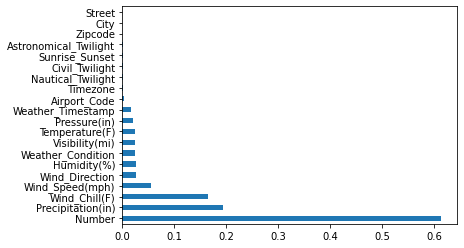

In [14]:
missing_percen[missing_percen !=0].plot(kind='barh')

remove column you dont want to use 

##Exploratory Analysis and Visualization
columns to analyze:

1. City
2. Start Time
3. Start Lat,Start Lng


###City

In [15]:
cities=df.City.unique()
len(cities)

11682

In [16]:
cities_by_accident=df.City.value_counts()
cities_by_accident


Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [17]:
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

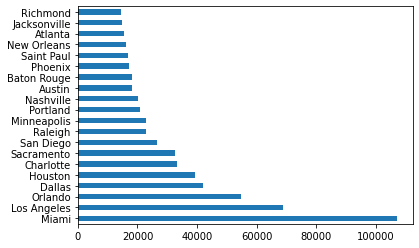

In [18]:
cities_by_accident[:20].plot(kind='barh')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


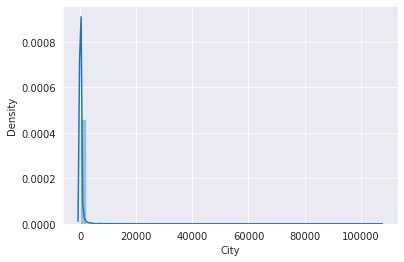

In [26]:
import seaborn as sns
sns.set_style("darkgrid")
sns.distplot(cities_by_accident)

In [27]:
high_accident_cities=cities_by_accident[cities_by_accident>=10000]

low_accident_cities=cities_by_accident[cities_by_accident<10000]


In [28]:
len(high_accident_cities)/ len(cities)

0.002910460537579182

In [29]:
len(low_accident_cities)

11647

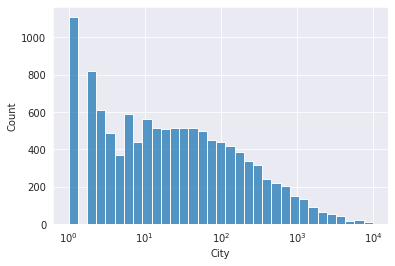

In [30]:
sns.histplot(low_accident_cities,log_scale=True)

In [31]:
cities_by_accident[cities_by_accident==1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

###Start Time

In [32]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [34]:
df.Start_time = pd.to_datetime(df.Start_Time)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


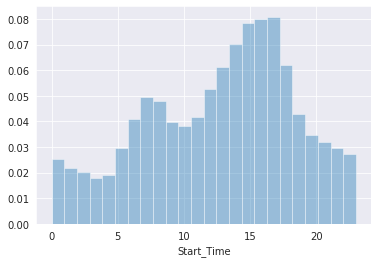

In [60]:
sns.distplot(pd.DatetimeIndex(df.Start_time).hour,bins=24,norm_hist=True,kde=False)

most accident happens from 2pm to 6pm as [probably people are in hurry to come home form their work].

Next highest number is from 6am to 8am.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


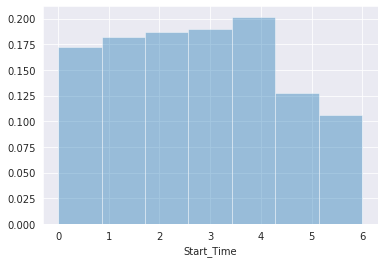

In [61]:
sns.distplot(pd.DatetimeIndex(df.Start_time).dayofweek,bins=7,norm_hist=True,kde=False)

Is the distribution of accidents by hour same on weekend as weekdays ?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


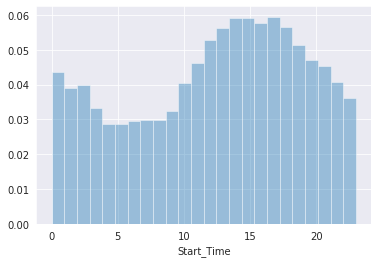

In [91]:
sunday_start_time=df.Start_Time[df.Start_time.dt.dayofweek == 6]
sns.distplot(pd.DatetimeIndex(sunday_start_time).hour,bins=24,norm_hist=True,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


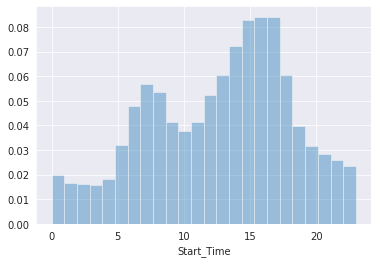

In [93]:
monday_start_time=df.Start_Time[df.Start_time.dt.dayofweek == 0]
sns.distplot(pd.DatetimeIndex(monday_start_time).hour,bins=24,norm_hist=True,kde=False)

On Sundays peak occurs on 12pm to 3pm and 5 pm as well
though on weekdays it occurs on 3pm to 6 pm as generic trend

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


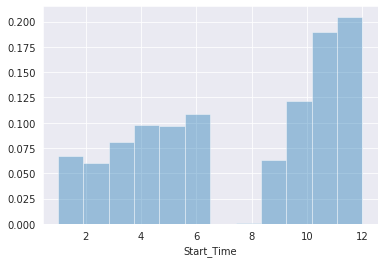

In [111]:
df_2020=df.Start_Time[df.Start_time.dt.year== 2020]
sns.distplot(pd.DatetimeIndex(df_2020).month,bins=12,norm_hist=True,kde=False)


###Start longitude and latitude

In [115]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [117]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

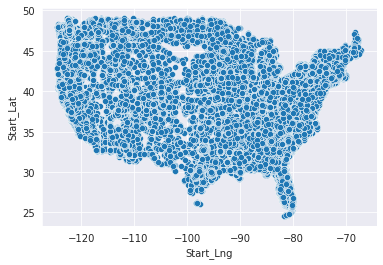

In [120]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat)

In [121]:
sample_df=df.sample(int(0.1*len(df)))


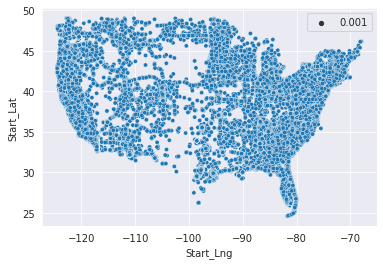

In [122]:
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat,size=0.001)

In [123]:
import folium

In [126]:
from folium.plugins import HeatMap

In [131]:
heat_data=zip(list(df.Start_Lng),list(df.Start_Lat))

In [146]:
sample_df=df.sample(int(0.001*len(df)))
lat_long_pairs=list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [147]:
map=folium.Map()
HeatMap(lat_long_pairs).add_to(map)
map


##Ask question and answer them

1. Which 5 cities have the highest number of accident ? 
2. Is there New York in top 10 most accident ?
Why or Why not ?
3. Which state has the most accidents by numbers ?
4. What time are accidents most frequent in ?
5. which days of week has most accidents ?
6. Which months have the most accidents ?
7. What is the trend of the accident year over year ?(increasing / decreasing)


the state with highest number of accidents are: 

1. Miami
2. Los angeles
3. Orlando
4. Dallas
5. Houston

 No because there is no data of New york.

#Summary and Conclusion
#insights:

-No data about New York

-The number of accident decreases exponentially

-Less than 0.29% of city have more than 10000 accidents

-Over 1100 cities have 1 accident only which we need to investigate